In [5]:
# memuat pustaka yang dibutuhkan
import numpy as np
import pandas as pd

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
# contoh dataset pelanggan (simulasi)
np.random.seed(123)
data = pd.DataFrame({
    'customerID': np.arange(1, 1001),
    'UsageData': np.random.normal(50, 15, 1000), # Penggunaan data (GB)
    'Tenure': np.random.randint(1, 61, 1000), # Lama berlangganan (bulan)
    'Complaints': np.random.choice([0, 1], size=1000), # Keluhan pelanggan (0=tidak, 1=iya)
    'Churn': np.random.choice([0, 1], size=1000) # Apakah pelanggan churn
})

In [8]:
# Membagi data menjadi set pelatihan dan pengujian
X = data[['UsageData', 'Tenure', 'Complaints']]
y = data ['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

In [9]:
# Model prediksi (contoh: Logistik Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
# Prediksi pada data uji
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[68 36]
 [67 29]]
              precision    recall  f1-score   support

           0       0.50      0.65      0.57       104
           1       0.45      0.30      0.36        96

    accuracy                           0.48       200
   macro avg       0.47      0.48      0.46       200
weighted avg       0.48      0.48      0.47       200



In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Mengambil dataset Advertising
url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
data = pd.read_csv(url)
data = data.drop(columns=['Unnamed: 0']) # Hapus kolom indeks yang tidak perlu

print(data.head())

      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


In [18]:
print(data.columns)

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')


In [19]:
# Prepare the data Using sales as dependent variable and other feature as independent variables
X = data [['TV', 'radio', 'newspaper']]
y = data['sales']

In [20]:
# Add constant to predictor variables
X = sm.add_constant(X)

# Fit linier regression model
model = sm.OLS(y, X).fit()

# Calculate prediction intervals
prstd, iv_l, iv_u = wls_prediction_std(model)

Text(0.5, 1.0, 'Actual vs Predicted Datarate with Prediciton Intervals')

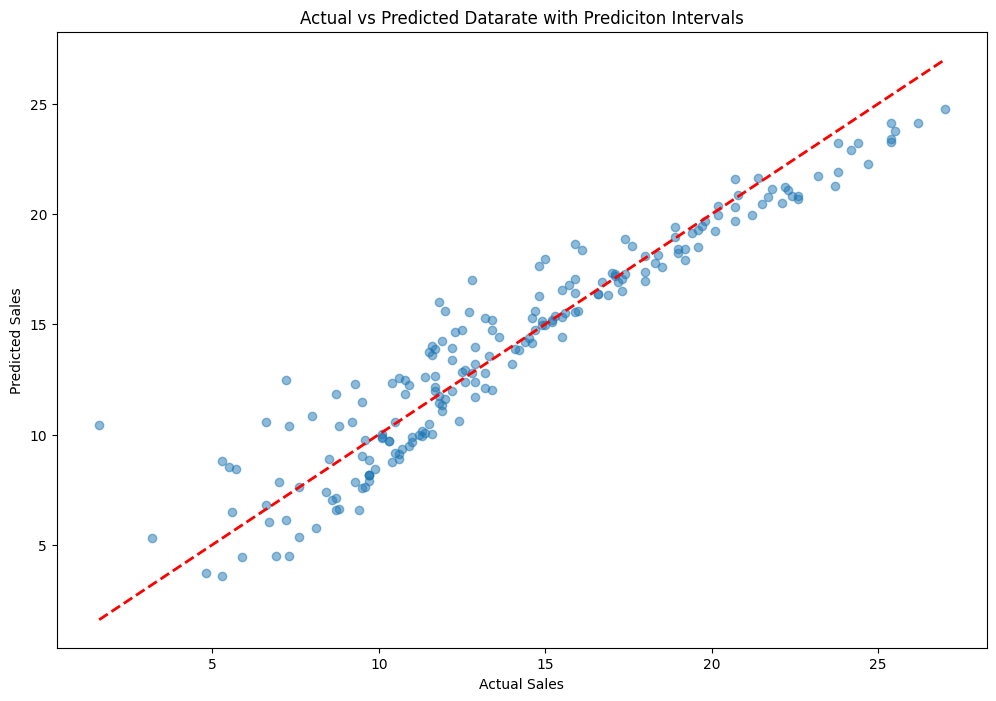

In [28]:
# Generate prediction for plotting
y_pred = model.predict(X)

# Create the plot
plt.figure(figsize=(12, 8))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Datarate with Prediciton Intervals')

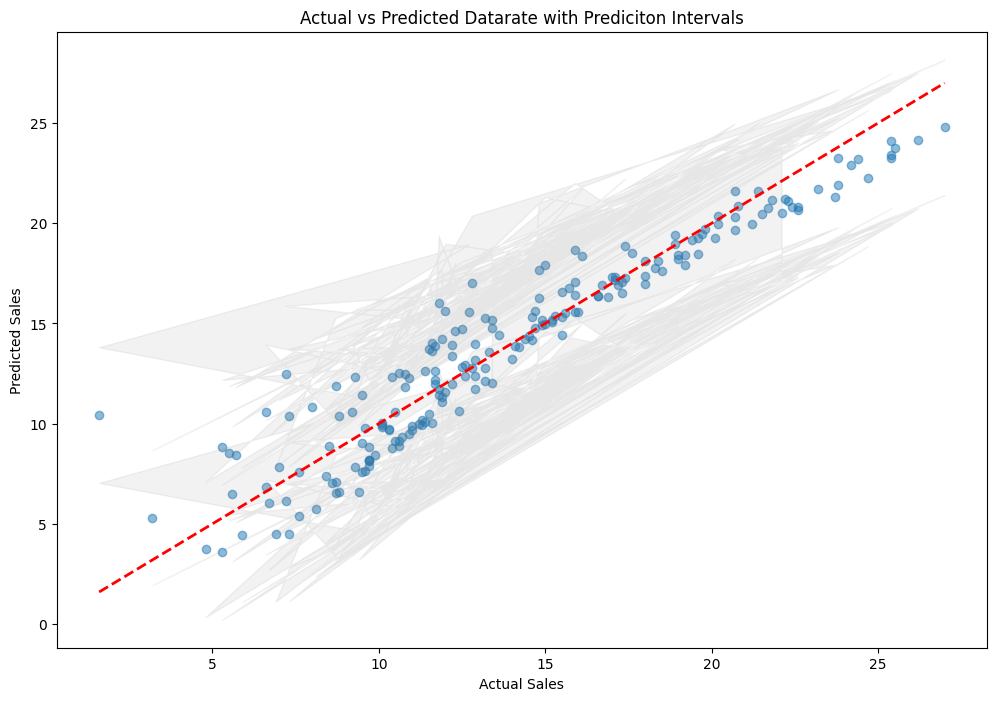

In [29]:
# Create the plot
plt.figure(figsize=(12, 8))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Datarate with Prediciton Intervals')

# Add prediction intervals
plt.fill_between(y, iv_l, iv_u, color='gray', alpha=0.1)
plt.show()

In [24]:
# Print the mode summary and equation coeffucients
print("\
Model Summary:")
print(model.summary().tables[1])

Model Summary:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011


In [25]:
# Create equation string
coef = model.params
equation = "Sales = {:.2f}".format(coef[0])
for i, col in enumerate(X.columns[1:], 1):
  equation += " + ({:.2f} x {})".format(coef[i], col)

print("\
Regression Equation:")
print(equation)

Regression Equation:
Sales = 2.94 + (0.05 x TV) + (0.19 x radio) + (-0.00 x newspaper)


/tmp/ipython-input-770329345.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equation = "Sales = {:.2f}".format(coef[0])
/tmp/ipython-input-770329345.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equation += " + ({:.2f} x {})".format(coef[i], col)
